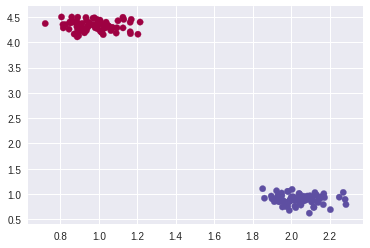

In [5]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# DATA FOR CLASSIFICATION
np.random.seed(0)
X, y = make_blobs(n_samples=150, centers=2, n_features=2, cluster_std=0.1,random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

reshaped_y = np.array(y).reshape(len(y),1)

enc = OneHotEncoder()
enc.fit(reshaped_y)
encoded_y = enc.transform(reshaped_y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.33, random_state=42)
# --------------------------

In [6]:
import numpy as np


# FUNCTIONS FOR FORWARD PASS
def ReLU(x):
    y = []
    for scalar in x:
        y.append(scalar * (scalar > 0))
    return np.array(y)


def softmax(x):
    e_x = np.exp(x - np.max(x))
    out = e_x / e_x.sum()
    return out


def calc_dg_da_2(a_2):
    dg_da_2 = []
    
    for ai in a_2:
        if (ai >= 0):
            dg_da_2.append(ai)
        else:
            dg_da_2.append(0)
            
    return dg_da_2


def calc_df_da_1(a_1):
    df_da_1 = []
        
    for ai in a_1:
        df_da_1.append((1 - np.tanh(ai))**2)
            
    return df_da_1

    
#DERIVATIVES OF tanh():df/da1 & ReLU():dg/da2

class NeuralNetwork:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        self.W_1 = np.random.rand(2,2)
        self.W_2 = np.random.rand(2,2)
        self.W_out = np.random.rand(2,2)
        self.W_ResNet = np.random.rand(2,2)
        
        self.b_1 = np.random.rand(2,self.x.shape[1])
        self.b_2 = np.random.rand(2,self.x.shape[1])
        self.b_out = np.random.rand(2,self.x.shape[1])
        self.b_ResNet = np.random.rand(2,self.x.shape[1])
        

    def feedforward(self):    
        self.a_1 = np.add(self.W_1.dot(self.x), self.b_1)
        self.z_1 = np.tanh(self.a_1)
        self.a_2 = np.add(self.W_2.dot(self.z_1), self.b_2)
        self.z_2 = ReLU(self.a_2)
        self.a_out_1 = np.add(self.W_out.dot(self.z_2), self.b_out)
        self.a_out_2 = np.add(self.W_ResNet.dot(self.x), self.b_ResNet)
        self.a_out = np.add(self.a_out_1, self.a_out_2)
        self.z_out = softmax(self.a_out)
           
        
    def backprop(self):
        df_da_1 = np.array(map(calc_df_da_1, self.a_1))
        dg_da_2 = np.array(map(calc_dg_da_2, self.a_2))
        
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        delta_out = self.y - self.z_out    
        
        # I have no idea how to write this mess in clear matrix form
        delta_2 = np.array([np.diag(dg_da_2i).dot(self.W_out.T).dot(delta_outi) for dg_da_2i, delta_outi in zip(dg_da_2.T, delta_out.T)]).T
        delta_1 = np.array([np.diag(df_da_1i).dot(self.W_out.T).dot(delta_2i) for df_da_1i, delta_2i in zip(df_da_1.T, delta_2.T)]).T
    
        dW_ResNet = delta_out.dot(self.x.T)
        dW_out = delta_out.dot(self.z_2.T)
        dW_2 = delta_2.dot(self.z_1.T)
        dW_1 = delta_1.dot(self.x.T)
       
        # update the weights with the derivative (slope) of the loss function        
        self.W_1 += 0.01*dW_1
        self.W_2 += 0.01*dW_2
        self.W_out += 0.01*dW_out
        self.W_ResNet += 0.01*dW_ResNet
        
        self.b_1 += 0.01*delta_1
        self.b_2 += 0.01*delta_2
        self.b_out += 0.01*delta_out
        self.b_ResNet += 0.01*delta_out


if __name__ == "__main__":
    nn = NeuralNetwork(X_train.T, y_train.T)
    

    for i in range(150):
        nn.feedforward()
        nn.backprop()

    print(nn.output)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [7]:
W_1 = np.random.rand(2,2)
X_train.T
W_1.dot(X_train.T).shape

(2, 100)

In [8]:
dg_da_2

NameError: ignored